### Figure 7. Khatri–Rao test matrices: Comparison of base distributions. 
(*Left*) Injectivity $\alpha \coloneqq \sigma_{\min}^2(\mathbf{\Omega}^\top \mathbf{Q})$ and  
(*Right*) RSVD relative error  
$$
\frac{\|\mathbf{A} - \hat{\mathbf{A}}\|_{\mathrm{F}}}{\|\mathbf{A}\|_{\mathrm{F}}}
$$  
for Khatri–Rao test matrices with several base distributions, with base dimension $d_0 = 2$ and tensor order $\ell = 10$.  

The orthonormal matrix $\mathbf{Q} \in \mathbb{R}^{2^{10} \times 50}$ consists of  
(*top row*) the first 50 columns of the WHT matrix, or  
(*bottom row*) 50 orthonormalized Kronecker–Gaussian vectors.  

The RSVD algorithm is applied to the matrix  
$\mathbf{A} = \mathbf{Q}\mathbf{Q}^\top + 10^{-4}\mathbf{I}$.  

Markers track the median of 100 trials; the shaded region is bounded by the 10% and 90% quantiles.  
The Gaussian baseline comes from a full Gaussian test matrix.  

In the top-left panel, the real Rademacher distribution is not visible because the median value of $\sigma_{\min}(\mathbf{\Omega}^\top \mathbf{Q}) = 0$ for $k \le 10^3$.

---

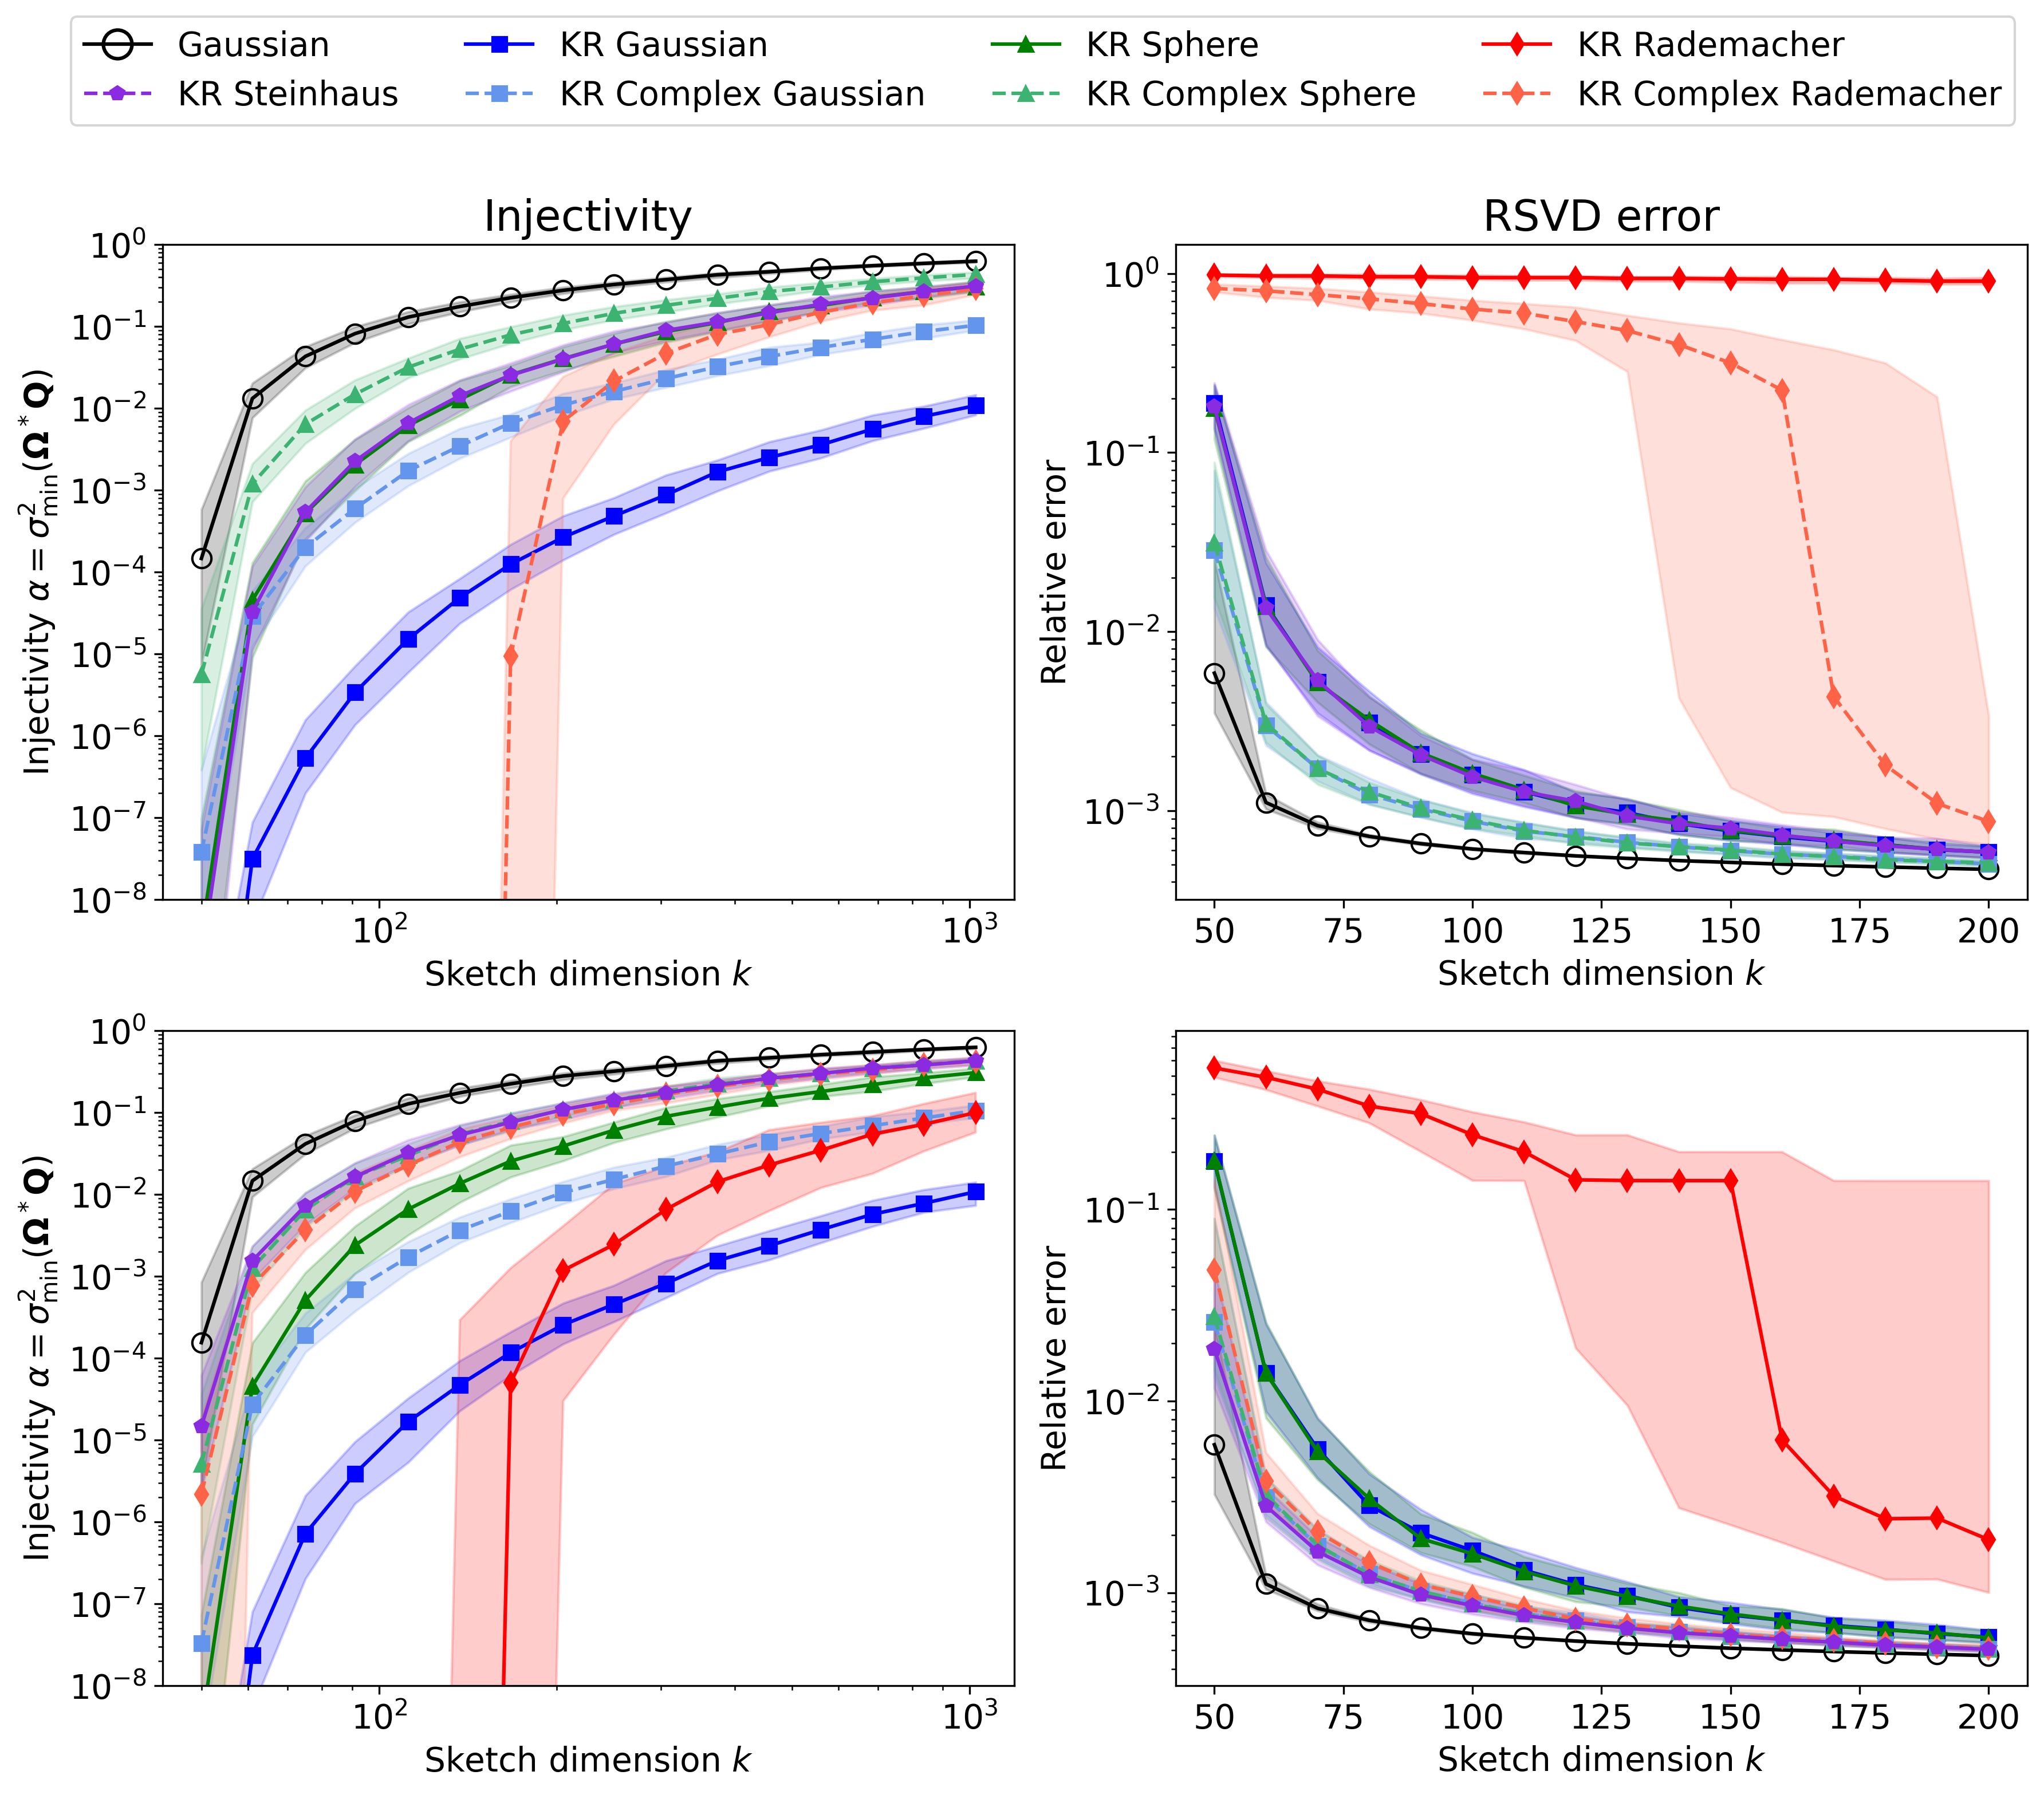

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.lines import Line2D

colors = {
    "Gaussian":              "black",
    "KR Gaussian":           "blue",
    "KR Sphere":             "green",
    "KR Complex Gaussian":   "cornflowerblue",
    "KR Complex Sphere":     "mediumseagreen",
    "KR Rademacher":         "red",
    "KR Complex Rademacher": "tomato",
    "KR Steinhaus":           "blueviolet",
}
styles = {
    "Gaussian":              ("-o", 12),
    "KR Gaussian":           ("-s", 6),
    "KR Sphere":             ("-^", 6),
    "KR Complex Gaussian":   ("--s", 6),
    "KR Complex Sphere":     ("--^", 6),
    "KR Rademacher":         ("-d", 6),
    "KR Complex Rademacher": ("--d", 6),
    "KR Steinhaus":           ("-p", 6),
}

tick_size   = 14
font_size   = 14
title_size  = 18

data         = loadmat('data/KRcombined2.mat')
ks_sigma     = data['ks_sigma'].flatten()
Q_names      = [str(n[0]) for n in data['Q_names'].flatten()]

fields = [
    (data['sigmin_gauss'],        "Gaussian"),
    (data['sigmin_krs_gauss'],    "KR Gaussian"),
    (data['sigmin_krs_sphere'],   "KR Sphere"),
    (data['sigmin_krs_gauss_C'],  "KR Complex Gaussian"),
    (data['sigmin_krs_sphere_C'], "KR Complex Sphere"),
    (data['sigmin_krs_radem'],    "KR Rademacher"),
    (data['sigmin_krs_cradem'],   "KR Complex Rademacher"),
    (data['sigmin_krs_steinhaus'], "KR Steinhaus"),
]

ks_error = data['ks_error'].flatten()
errors   = data['errors']              # shape: (numA, numM, numK, numRuns)
labels   = [str(lbl[0]) for lbl in data['labels'].flatten()]

median_err = np.median(errors, axis=3)
q10_err    = np.quantile(errors, 0.1, axis=3)
q90_err    = np.quantile(errors, 0.9, axis=3)

legend_handles = [
    Line2D([], [], color=colors["Gaussian"], marker='o', linestyle='-',
           markerfacecolor='none', markeredgewidth=1.5,
           linewidth=1.5, markersize=12, label="Gaussian"),
    Line2D([], [], color=colors["KR Steinhaus"],         marker='p', linestyle='--',  label="KR Steinhaus"),
    Line2D([], [], color=colors["KR Gaussian"],          marker='s', linestyle='-',  label="KR Gaussian"),
    Line2D([], [], color=colors["KR Complex Gaussian"],  marker='s', linestyle='--', label="KR Complex Gaussian"),
    Line2D([], [], color=colors["KR Sphere"],            marker='^', linestyle='-',  label="KR Sphere"),
    Line2D([], [], color=colors["KR Complex Sphere"],    marker='^', linestyle='--', label="KR Complex Sphere"),
    Line2D([], [], color=colors["KR Rademacher"],        marker='d', linestyle='-',  label="KR Rademacher"),
    Line2D([], [], color=colors["KR Complex Rademacher"],marker='d', linestyle='--', label="KR Complex Rademacher"),
    
]

nQ = len(Q_names)
fig, axes = plt.subplots(nQ, 2, figsize=(12, 10), dpi=300)

for qi, q_name in enumerate(Q_names):
    ax0, ax1 = axes[qi]

    if qi == 0:
        ax0.set_title("Injectivity", fontsize=title_size)
        ax1.set_title("RSVD error", fontsize=title_size)

    # σ_min^2 
    for arr, key in fields:
        vals_sq = arr[:, :, qi]**2
        med = np.median(vals_sq, axis=0)
        lo  = np.percentile(vals_sq, 10, axis=0)
        hi  = np.percentile(vals_sq, 90, axis=0)

        ax0.fill_between(ks_sigma, lo, hi, color=colors[key], alpha=0.2)
        ls, _ = styles[key]
        plot_kwargs = {}
        if key == "Gaussian":
            plot_kwargs = dict(linewidth=1.5, markersize=8,
                               markerfacecolor='none', markeredgewidth=1)
        ax0.plot(ks_sigma, med, ls, color=colors[key], **plot_kwargs)

    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_ylim(1e-8, 1)
    ax0.set_xlabel("Sketch dimension $k$", fontsize=font_size)
    ax0.set_ylabel(r"Injectivity $\alpha=\sigma_{\min}^2(\mathbf{\Omega}^*\mathbf{Q})$", fontsize=font_size)
    ax0.tick_params(labelsize=tick_size)
    ax0.grid(False)

    # RSVD error panel 
    for mi, label in enumerate(labels):
        med_e = median_err[qi, mi, :]
        lo_e  = q10_err[qi, mi, :]
        hi_e  = q90_err[qi, mi, :]

        ls, _ = styles[label]
        semilogy_kwargs = {}
        if label == "Gaussian":
            semilogy_kwargs = dict(linewidth=1.5, markersize=8,
                                   markerfacecolor='none', markeredgewidth=1)
        ax1.fill_between(ks_error, lo_e, hi_e, color=colors[label], alpha=0.2)
        ax1.semilogy(ks_error, med_e, ls, color=colors[label], **semilogy_kwargs)

    ax1.set_xlabel("Sketch dimension $k$", fontsize=font_size)
    ax1.set_ylabel("Relative error", fontsize=font_size)
    ax1.tick_params(labelsize=tick_size)
    ax1.grid(False)

fig.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.51, 1.05),
    ncol=4,
    fontsize=14,
    frameon=True
)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig7.png", dpi=300, bbox_inches="tight")
plt.show()